# Operações de I.O.

# Acessando dados via API

Cada base de dados segue todo um conjunto de protocolos e dados!

## Consequência:

Não existe um protocolo/método único de acesso aos dados.


# Bibliotecas úteis

In [ ]:
!pip install geopandas

In [1]:
# importing packages
import os
import pandas as pd
import numpy as np
import requests
import zipfile
import geopandas as gpd

# Alguns exemplos de acesso a dados remotos

In [2]:
IBGE_URL = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/UFs'

IBGE = pd.read_html(IBGE_URL)[0].set_index('Name').drop(['Parent Directory'])

# Drop na (empty lines):


IBGE = IBGE.loc[~IBGE['Last modified'].isna(), 'Last modified']
IBGE.index = IBGE.index.map(lambda name: name.replace('/', ''))
IBGE.to_frame()

,Last modified
Name,
AC,2021-03-01 09:59
AL,2021-03-01 09:59
AM,2021-03-01 09:59
AP,2021-03-01 09:59
BA,2021-03-01 09:59
CE,2021-03-01 09:59
DF,2021-03-01 09:59
ES,2021-03-01 09:59
GO,2021-03-01 09:59


In [3]:



def _read_page(path:str, name:str, storage:dict):
  print(name)
  storage[name] = pd.read_html(os.path.join(path, name))[0]

def read_page(df):

  storage = {}

  IBGE.index.map(lambda x: _read_page(IBGE_URL, x, storage))

  return storage

storage = read_page(IBGE)

AC
AL
AM
AP
BA
CE
DF
ES
GO
MA
MG
MS
MT
PA
PB
PE
PI
PR
RJ
RN
RO
RR
RS
SC
SE
SP
TO


In [4]:
storage

{'AC':    Unnamed: 0                     Name     Last modified  Size  Description
 0         NaN                      NaN               NaN   NaN          NaN
 1         NaN         Parent Directory               NaN     -          NaN
 2         NaN  AC_Mesorregioes_2020..>  2021-03-01 09:59  482K          NaN
 3         NaN  AC_Microrregioes_202..>  2021-03-01 09:59  643K          NaN
 4         NaN   AC_Municipios_2020.zip  2021-03-01 09:59  1.6M          NaN
 5         NaN  AC_RG_Imediatas_2020..>  2021-03-01 09:59  644K          NaN
 6         NaN  AC_RG_Intermediarias..>  2021-03-01 09:59  482K          NaN
 7         NaN           AC_UF_2020.zip  2021-03-01 09:59  471K          NaN
 8         NaN                      NaN               NaN   NaN          NaN,
 'AL':    Unnamed: 0                     Name     Last modified  Size  Description
 0         NaN                      NaN               NaN   NaN          NaN
 1         NaN         Parent Directory               NaN     -

In [5]:
def _fetch_zip_files(series) -> list:
  series = series.dropna()
  series = series.loc[series.str.contains('zip').dropna()].values

  return series

def fetch_zip_files(storage) -> list:

  zipFiles = {}

  for key in storage.keys():
    series = storage[key]['Name']
    zipFiles[key] = _fetch_zip_files(series)
  zipFiles = pd.DataFrame(zipFiles)

  zipFiles.index.name = 'Files to Download'

  return zipFiles


In [6]:

zipFiles = fetch_zip_files(storage)

zipFiles


,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
Files to Download,,,,,,,,,,,,,,,,,,,,,
0,AC_Municipios_2020.zip,AL_Municipios_2020.zip,AM_Municipios_2020.zip,AP_Municipios_2020.zip,BA_Municipios_2020.zip,CE_Municipios_2020.zip,DF_Municipios_2020.zip,ES_Municipios_2020.zip,GO_Municipios_2020.zip,MA_Municipios_2020.zip,...,PR_Municipios_2020.zip,RJ_Municipios_2020.zip,RN_Municipios_2020.zip,RO_Municipios_2020.zip,RR_Municipios_2020.zip,RS_Municipios_2020.zip,SC_Municipios_2020.zip,SE_Municipios_2020.zip,SP_Municipios_2020.zip,TO_Municipios_2020.zip
1,AC_UF_2020.zip,AL_UF_2020.zip,AM_UF_2020.zip,AP_UF_2020.zip,BA_UF_2020.zip,CE_UF_2020.zip,DF_UF_2020.zip,ES_UF_2020.zip,GO_UF_2020.zip,MA_UF_2020.zip,...,PR_UF_2020.zip,RJ_UF_2020.zip,RN_UF_2020.zip,RO_UF_2020.zip,RR_UF_2020.zip,RS_UF_2020.zip,SC_UF_2020.zip,SE_UF_2020.zip,SP_UF_2020.zip,TO_UF_2020.zip


In [7]:
zipFiles = zipFiles.stack()

zipFiles = zipFiles.to_frame()
zipFiles.index.names = ['Files to Download', 'Estados']
zipFiles.columns = ['ZipFilename']
zipFiles = zipFiles.swaplevel().sort_index()
zipFiles.head()

ZipFilename
Estados Files to Download                        
AC      0                  AC_Municipios_2020.zip
        1                          AC_UF_2020.zip
AL      0                  AL_Municipios_2020.zip
        1                          AL_UF_2020.zip
AM      0                  AM_Municipios_2020.zip

In [19]:
def download_IBGE_files(group:pd.DataFrame , fname = None):
  estado, FileToDownload = group.index.values[0]
  zipfilename = group.values[0]

  url = os.path.join(IBGE_URL, estado, zipfilename)
  r = requests.get(url)

  if fname == None:
    fname = zipfilename

  with open(fname , 'wb') as FileWriter:
    FileWriter.write(r.content)
  print('File {0} Downloaded'.format(zipfilename.ljust(25)), end = '-'*60 + '\n'*2)


  return group


In [20]:
# Baixando cada arquivo de cada estado
zipFiles.head(3).groupby(zipFiles.index.names).transform(lambda group: download_IBGE_files(group))


File AC_Municipios_2020.zip    Downloaded------------------------------------------------------------

File AC_UF_2020.zip            Downloaded------------------------------------------------------------

File AL_Municipios_2020.zip    Downloaded------------------------------------------------------------



ZipFilename
Estados Files to Download                        
AC      0                  AC_Municipios_2020.zip
        1                          AC_UF_2020.zip
AL      0                  AL_Municipios_2020.zip

In [27]:
# Deszipando cada arquivo baixado:

for arquivo in zipFiles["ZipFilename"]:
  with zipfile.ZipFile(arquivo, 'r') as zip_ref:
    zip_ref.extractall()

  print(arquivo + " descompactado")




AC_Municipios_2020.zip descompactado
AC_UF_2020.zip descompactado
AL_Municipios_2020.zip descompactado
AL_UF_2020.zip descompactado
AM_Municipios_2020.zip descompactado
AM_UF_2020.zip descompactado
AP_Municipios_2020.zip descompactado
AP_UF_2020.zip descompactado
BA_Municipios_2020.zip descompactado
BA_UF_2020.zip descompactado
CE_Municipios_2020.zip descompactado
CE_UF_2020.zip descompactado
DF_Municipios_2020.zip descompactado
DF_UF_2020.zip descompactado
ES_Municipios_2020.zip descompactado
ES_UF_2020.zip descompactado
GO_Municipios_2020.zip descompactado
GO_UF_2020.zip descompactado
MA_Municipios_2020.zip descompactado
MA_UF_2020.zip descompactado
MG_Municipios_2020.zip descompactado
MG_UF_2020.zip descompactado
MS_Municipios_2020.zip descompactado
MS_UF_2020.zip descompactado
MT_Municipios_2020.zip descompactado
MT_UF_2020.zip descompactado
PA_Municipios_2020.zip descompactado
PA_UF_2020.zip descompactado
PB_Municipios_2020.zip descompactado
PB_UF_2020.zip descompactado
PE_Municip

In [10]:
# Acessando os dados zipados
AC_UF = gpd.read_file('AC_UF_2020.shp')

AC_UF.head()

Archive:  AC_UF_2020.zip
  inflating: AC_UF_2020.cpg          
  inflating: AC_UF_2020.dbf          
  inflating: AC_UF_2020.prj          
  inflating: AC_UF_2020.shp          
  inflating: AC_UF_2020.shx          


,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."


<Axes: >

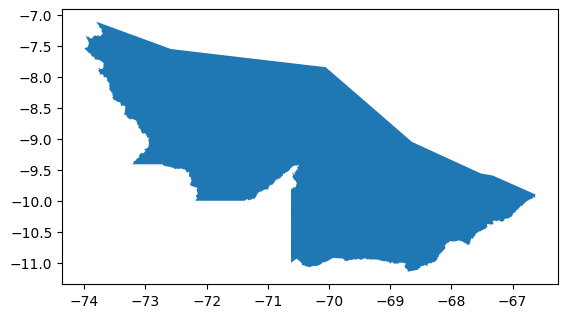

In [11]:
# Visualização do Estado do Acre

AC_UF.plot()

Archive:  SP_UF_2020.zip
replace SP_UF_2020.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SP_UF_2020.cpg          
replace SP_UF_2020.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: SP_UF_2020.dbf          
replace SP_UF_2020.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace SP_UF_2020.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]es
error:  invalid response [[y]es]
replace SP_UF_2020.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: [yes]
error:  invalid response [[yes]]
replace SP_UF_2020.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: SP_UF_2020.prj          
replace SP_UF_2020.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SP_UF_2020.shp          
replace SP_UF_2020.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SP_UF_2020.shx          


,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,35,São Paulo,SP,Sudeste,"MULTIPOLYGON (((-48.03716 -25.35794, -48.03750..."


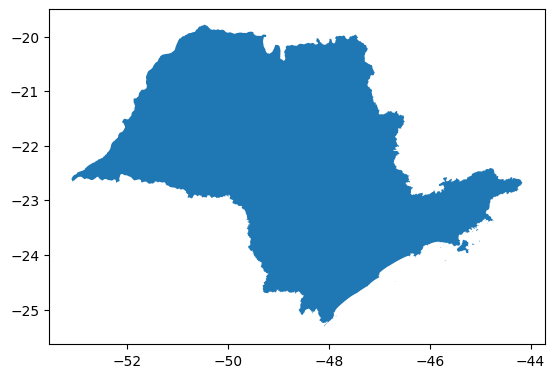

In [21]:
# Visualização do Estado de São Paulo
SP_UF = gpd.read_file('SP_UF_2020.shp')

SP_UF.plot()


SP_UF.head()
